# Merge Sort

The **merge sort** algorithm works recursively:
- Do a merge sort on the first half of the array.
- Do a merge sort on the second half of the array.
- Merge the halves together to get the final order.

In [1]:
# This function sorts an array between the left and right indices.
# This is O(nlogn)
def merge_sort(array, left, right):
    if left < right:
        middle = (left + right) // 2
        merge_sort(array, left, middle)
        merge_sort(array, middle+1, right)
        merge(array, left, middle, right)

In [2]:
# This function merges two segments of an array.
def merge(array, left, middle, right):
    left_segment = array[left:middle+1]
    right_segment = array[middle+1:right+1]
    j = 0
    n = 0
    
    for i in range(left, right + 1):
        if n == len(right_segment): # right segment is used up
            array[i] = left_segment[j]
            j += 1
        elif j == len(left_segment): # left segment is used up
            array[i] = right_segment[n]
            n += 1
        elif left_segment[j] < right_segment[n]:
            array[i] = left_segment[j]
            j += 1
        else:
            array[i] = right_segment[n]
            n += 1 
    

In [3]:
# This function creates and returns a small randomized array.
from random import randrange
def random_array():
    array = []
    n = randrange(20)
    while len(array) < n:
        array.append(randrange(20))
    return array

In [4]:
# This function prints something if a sorting function fails.
def test_merge_sort():
    array = random_array()
    correct = sorted(array)
    merge_sort(array, 0, len(array)-1)
    if array != correct:
        print("Error sorting", array, "with", sort)

In [5]:
# This code should have no output
for test in range(100):
    test_merge_sort()

Let's compare merge sort with selection sort:

In [6]:
# This function sorts an array.
# The algorithm is O(n^2) where n = len(array).
def selection_sort(array):
    for i in range(len(array)):
        smallest = i
        for j in range(i, len(array)):
            if array[j] < array[smallest]:
                smallest = j
        array[i], array[smallest] = array[smallest], array[i]

In [7]:
# This function times a sorting function on a range of problem sizes.
def timer(sort, lengths):
    times = []
    for n in lengths:
        array = list(range(n))
        time = %timeit -n1 -r1 -o -q sort(array)
        times.append(time.average)
    return times

In [8]:
# This function just lets us call merge_sort simply.
def full_merge_sort(array):
    merge_sort(array, 0, len(array)-1)

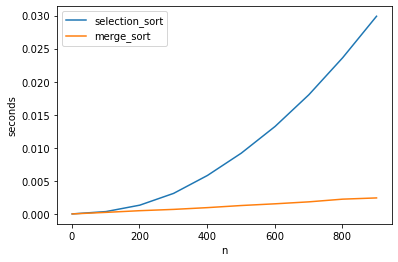

In [9]:
# This code plots some search times.
from matplotlib import pyplot
from numpy import arange

n = arange(1, 1000, 100)

pyplot.plot(n, timer(selection_sort, n), label="selection_sort")
pyplot.plot(n, timer(full_merge_sort, n), label="merge_sort")

pyplot.ylabel("seconds")
pyplot.xlabel("n")
pyplot.legend()
pyplot.show()

Going from $O(n^2)$ to $O(nlogn)$ is a big improvement.